# Laboratorio 1 - Visión por Computadora
## Integrantes:

- Javier Alvarado - 21188
- Mario Guerra - 21008
- Emilio Solano - 21212


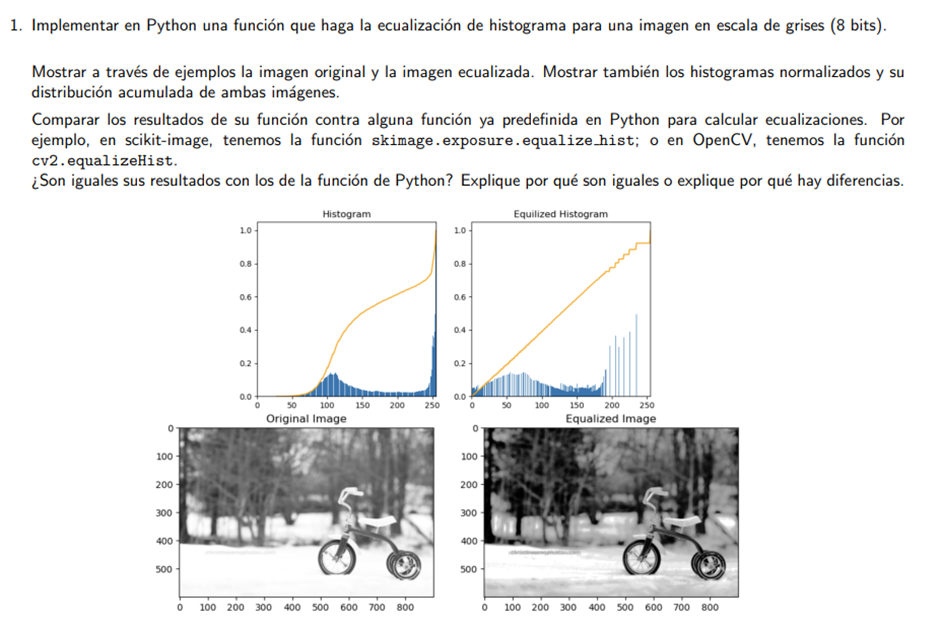

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski
import cv2

from skimage import exposure
from PIL import Image
from sklearn.cluster import k_means

In [2]:
img1 = plt.imread('assets/dog23.jpg')
img1.shape

(600, 600, 3)

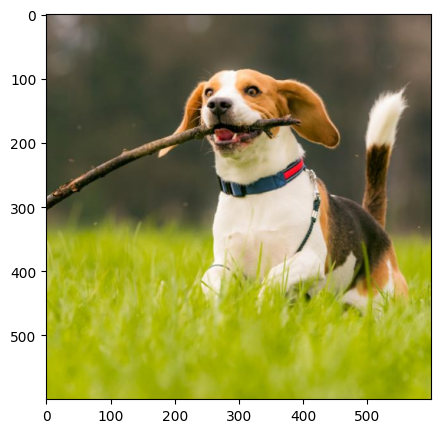

In [3]:
plt.figure(figsize=(5,5))
plt.imshow(img1)
plt.show()

In [4]:
img1 = img1[:,:,:3]
img1 = ski.color.rgb2gray(img1)

In [5]:
img1.shape

(600, 600)

In [6]:
# Convert to 8 bits format [0-255]
img1 = (255*img1).astype(np.uint8)

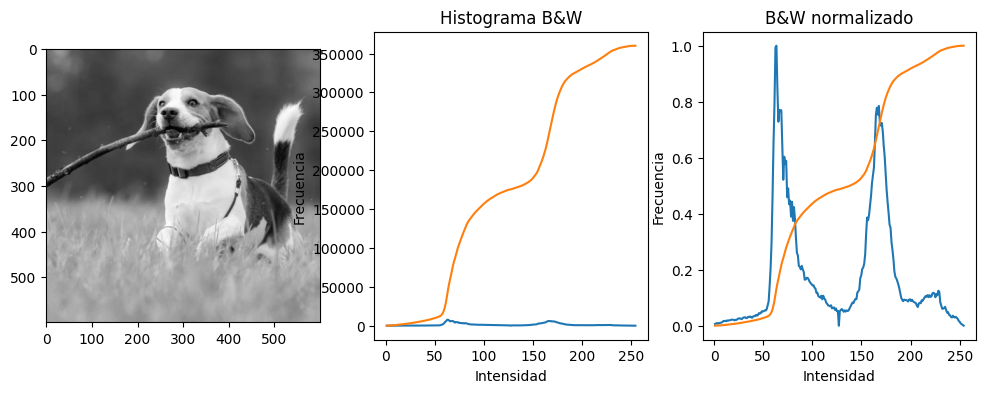

In [7]:
h = np.histogram(img1, bins=256)
pixnum = img1.shape[0] * img1.shape[1]

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,3,2)
plt.plot(h[1][1:], h[0])
plt.plot(h[1][1:], h[0].cumsum())
plt.title(f"Histograma B&W")
plt.xlabel("Intensidad")
plt.ylabel("Frecuencia")

plt.subplot(1,3,3)
plt.title('B&W normalizado')
plt.xlabel("Intensidad")
plt.ylabel("Frecuencia")
plt.plot(h[1][1:], h[0] / h[0].max())
plt.plot(h[1][1:], h[0].cumsum() / pixnum)

plt.show()


### Ecualizar la imagen

In [8]:
def hist_eq(img):
    """Ecualización de histograma manual."""
    hist, bins = np.histogram(img.flatten(), bins=256, range=[0, 256])
    cdf = hist.cumsum()
    cdf_norm = ((cdf - cdf[cdf > 0].min()) / (cdf.max() - cdf.min())) * 255
    img_eq = np.interp(img.flatten(), bins[:-1], cdf_norm).reshape(img.shape).astype(np.uint8)
    return img_eq

def get_hist_cdf(img):
    """Calcula histograma y CDF normalizada."""
    hist, bins = np.histogram(img.flatten(), bins=256, range=[0, 256])
    cdf = hist.cumsum() / hist.sum()
    return hist, bins, cdf

In [9]:
# Ecualizar imágenes
img_manual = hist_eq(img1)
img_cv2 = cv2.equalizeHist(img1)
img_sk = (exposure.equalize_hist(img1) * 255).astype(np.uint8)

# Obtener histogramas y CDFs
hist_orig, bins_orig, cdf_orig = get_hist_cdf(img1)
hist_manual, bins_manual, cdf_manual = get_hist_cdf(img_manual)
hist_cv2, bins_cv2, cdf_cv2 = get_hist_cdf(img_cv2)
hist_sk, bins_sk, cdf_sk = get_hist_cdf(img_sk)

#### Visualización de resultados

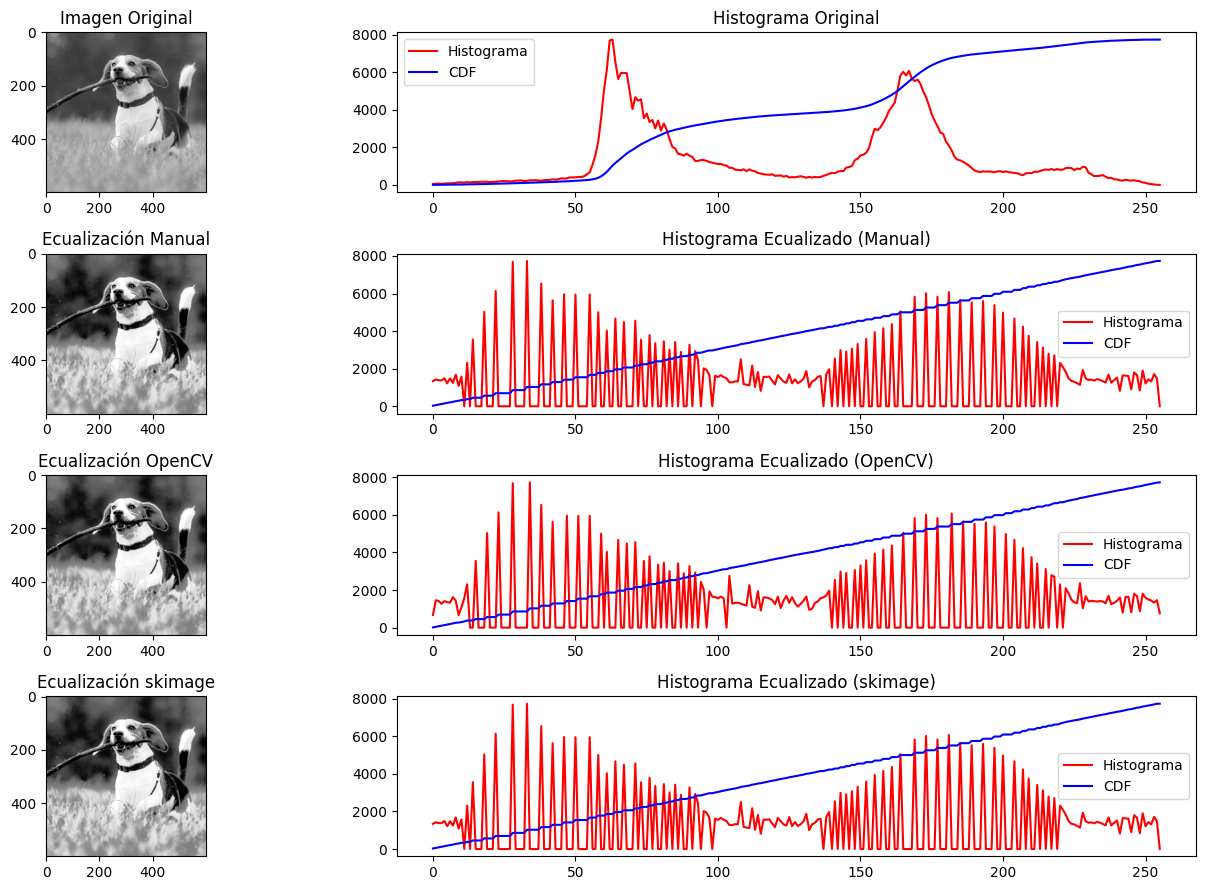

In [10]:
plt.figure(figsize=(15, 9))

# ---- Imagen original ----
plt.subplot(4, 2, 1)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.title("Imagen Original")

plt.subplot(4, 2, 2)
plt.plot(bins_orig[:-1], hist_orig, label="Histograma", color="red")
plt.plot(bins_orig[:-1], cdf_orig * hist_orig.max(), label="CDF", color="blue")
plt.legend()
plt.title("Histograma Original")

# ---- Ecualización Manual ----
plt.subplot(4, 2, 3)
plt.imshow(img_manual, cmap='gray', vmin=0, vmax=255)
plt.title("Ecualización Manual")

plt.subplot(4, 2, 4)
plt.plot(bins_manual[:-1], hist_manual, label="Histograma", color="red")
plt.plot(bins_manual[:-1], cdf_manual * hist_manual.max(), label="CDF", color="blue")
plt.legend()
plt.title("Histograma Ecualizado (Manual)")

# ---- Ecualización OpenCV ----
plt.subplot(4, 2, 5)
plt.imshow(img_cv2, cmap='gray', vmin=0, vmax=255)
plt.title("Ecualización OpenCV")

plt.subplot(4, 2, 6)
plt.plot(bins_cv2[:-1], hist_cv2, label="Histograma", color="red")
plt.plot(bins_cv2[:-1], cdf_cv2 * hist_cv2.max(), label="CDF", color="blue")
plt.legend()
plt.title("Histograma Ecualizado (OpenCV)")

# ---- Ecualización skimage ----
plt.subplot(4, 2, 7)
plt.imshow(img_sk, cmap='gray', vmin=0, vmax=255)
plt.title("Ecualización skimage")

plt.subplot(4, 2, 8)
plt.plot(bins_sk[:-1], hist_sk, label="Histograma", color="red")
plt.plot(bins_sk[:-1], cdf_sk * hist_sk.max(), label="CDF", color="blue")
plt.legend()
plt.title("Histograma Ecualizado (skimage)")

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Función propia vs. skimage')

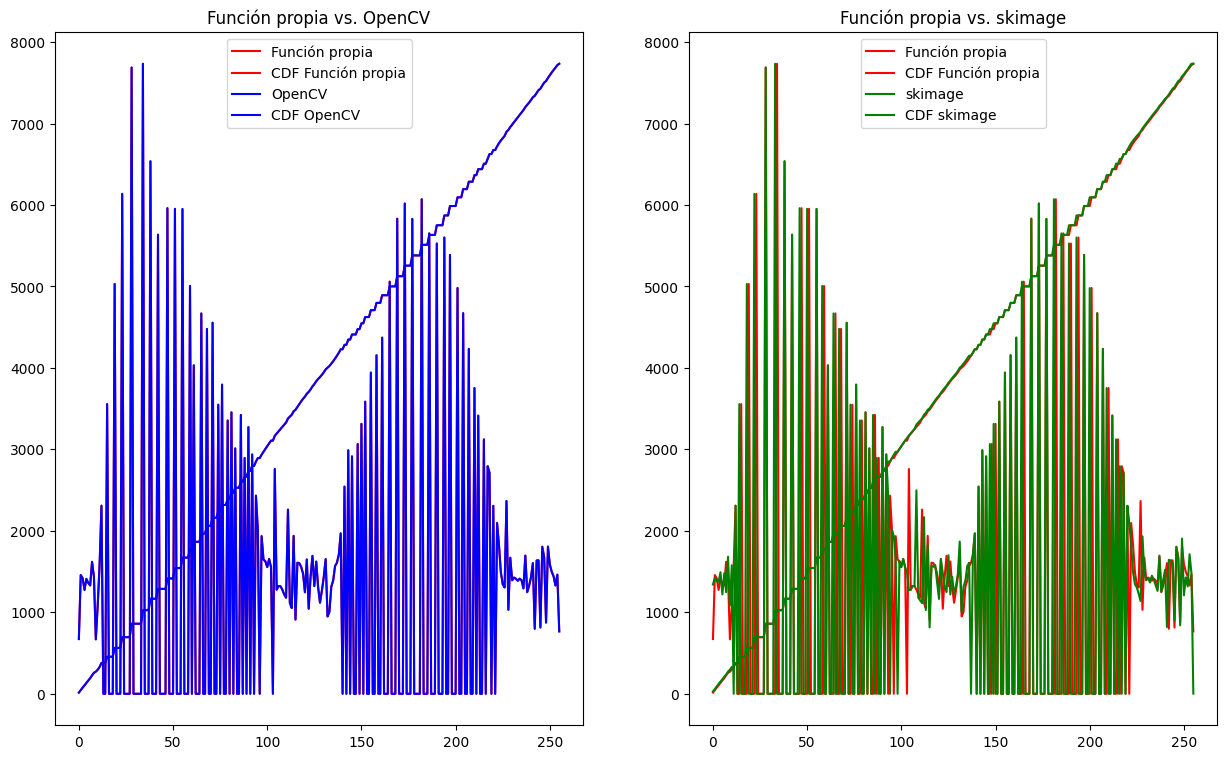

In [11]:
plt.figure(figsize=(15, 9))

plt.subplot(1,2,1)
plt.plot(bins_cv2[:-1], hist_cv2, label="Función propia", color="red")
plt.plot(bins_cv2[:-1], cdf_cv2 * hist_cv2.max(), label="CDF Función propia", color="red")
plt.plot(bins_cv2[:-1], hist_cv2, label="OpenCV", color="blue")
plt.plot(bins_cv2[:-1], cdf_cv2 * hist_cv2.max(), label="CDF OpenCV", color="blue")
plt.legend()
plt.title("Función propia vs. OpenCV")

plt.subplot(1,2,2)
plt.plot(bins_cv2[:-1], hist_cv2, label="Función propia", color="red")
plt.plot(bins_cv2[:-1], cdf_cv2 * hist_cv2.max(), label="CDF Función propia", color="red")
plt.plot(bins_sk[:-1], hist_sk, label="skimage", color="green")
plt.plot(bins_sk[:-1], cdf_sk * hist_sk.max(), label="CDF skimage", color="green")
plt.legend()
plt.title("Función propia vs. skimage")

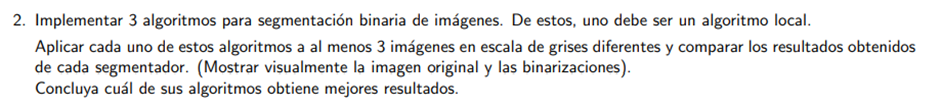

In [18]:
img2 = plt.imread('assets/iceland3.jpg')
img2.shape

(183, 275, 3)

In [19]:
img3 = plt.imread('assets/rice.jpg')
img3.shape

(850, 850, 3)

In [20]:
img2 = img2[:,:,:3]
img2 = ski.color.rgb2gray(img2)

img3 = img3[:,:,:3]
img3 = ski.color.rgb2gray(img3)

In [21]:
# Convert to 8 bits format [0-255]
img2 = (255*img2).astype(np.uint8)
img3 = (255*img3).astype(np.uint8)

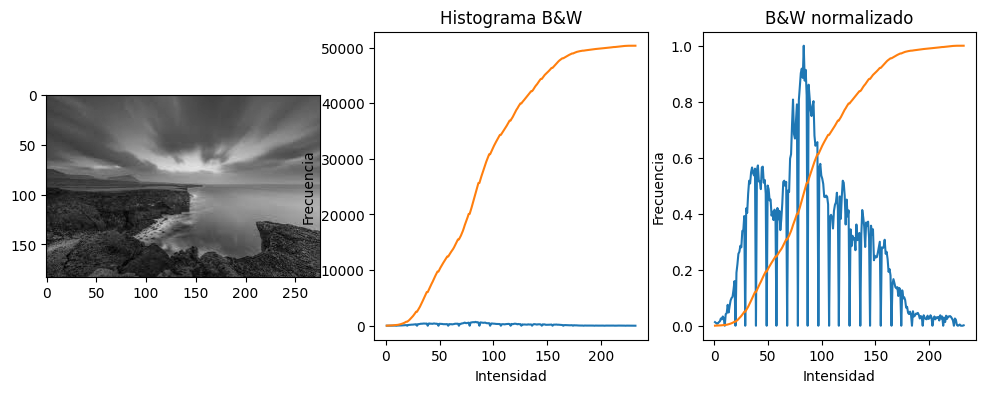

In [22]:
h = np.histogram(img2, bins=256)
pixnum = img2.shape[0] * img2.shape[1]

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,3,2)
plt.plot(h[1][1:], h[0])
plt.plot(h[1][1:], h[0].cumsum())
plt.title(f"Histograma B&W")
plt.xlabel("Intensidad")
plt.ylabel("Frecuencia")

plt.subplot(1,3,3)
plt.title('B&W normalizado')
plt.xlabel("Intensidad")
plt.ylabel("Frecuencia")
plt.plot(h[1][1:], h[0] / h[0].max())
plt.plot(h[1][1:], h[0].cumsum() / pixnum)

plt.show()

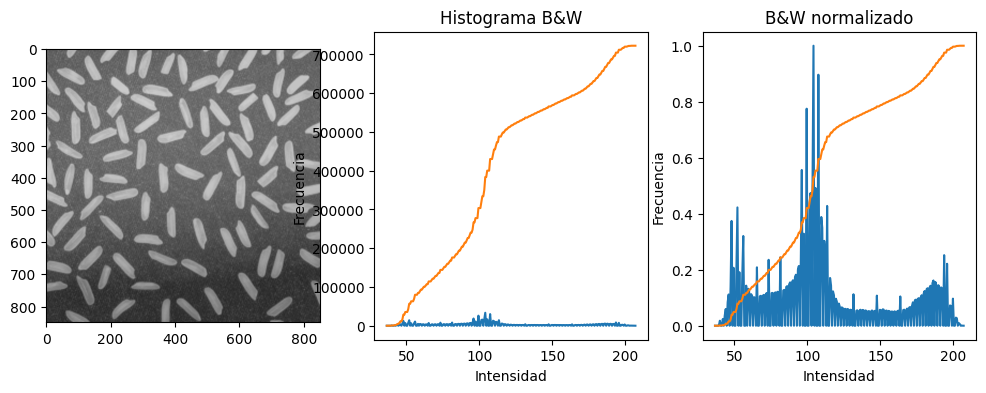

In [23]:
h = np.histogram(img3, bins=256)
pixnum = img3.shape[0] * img3.shape[1]

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(img3, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,3,2)
plt.plot(h[1][1:], h[0])
plt.plot(h[1][1:], h[0].cumsum())
plt.title(f"Histograma B&W")
plt.xlabel("Intensidad")
plt.ylabel("Frecuencia")

plt.subplot(1,3,3)
plt.title('B&W normalizado')
plt.xlabel("Intensidad")
plt.ylabel("Frecuencia")
plt.plot(h[1][1:], h[0] / h[0].max())
plt.plot(h[1][1:], h[0].cumsum() / pixnum)

plt.show()

In [24]:
from skimage.filters.thresholding import threshold_isodata, threshold_local, threshold_otsu

### Algoritmo 1: Isodata

In [25]:
th1 = threshold_isodata(img1)
img1th = 255 * (img1 >= th1).astype(np.uint8)
print(th1)

th2 = threshold_isodata(img2)
img2th = 255 * (img2 >= th2).astype(np.uint8)
print(th2)

th3 = threshold_isodata(img3)
img3th = 255 * (img3 >= th3).astype(np.uint8)
print(th3)

124
98
130


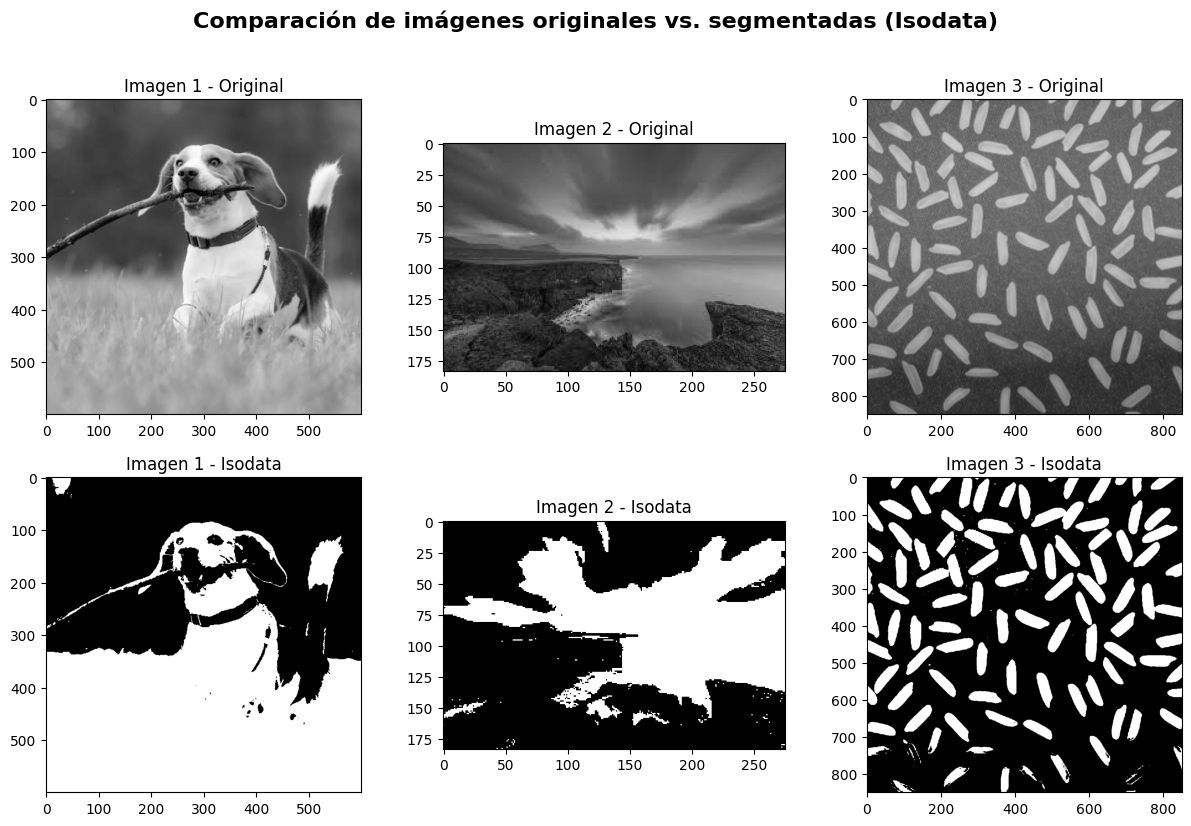

In [28]:
plt.figure(figsize=(15, 9))
plt.suptitle("Comparación de imágenes originales vs. segmentadas (Isodata)", fontsize=16, fontweight='bold')

# Imágenes 1
plt.subplot(2,3,1)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.title("Imagen 1 - Original")

plt.subplot(2,3,4)
plt.imshow(img1th, cmap='gray', vmin=0, vmax=255)
plt.title("Imagen 1 - Isodata")

# Imágenes 2
plt.subplot(2,3,2)
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
plt.title("Imagen 2 - Original")

plt.subplot(2,3,5)
plt.imshow(img2th, cmap='gray', vmin=0, vmax=255)
plt.title("Imagen 2 - Isodata")

# Imágenes 3
plt.subplot(2,3,3)
plt.imshow(img3, cmap='gray', vmin=0, vmax=255)
plt.title("Imagen 3 - Original")

plt.subplot(2,3,6)
plt.imshow(img3th, cmap='gray', vmin=0, vmax=255)
plt.title("Imagen 3 - Isodata")

plt.show()

### Algoritmo 2: Otsu

In [29]:
th1 = threshold_otsu(img1)
img1th = 255 * (img1 >= th1).astype(np.uint8)
print(th1)

th2 = threshold_otsu(img2)
img2th = 255 * (img2 >= th2).astype(np.uint8)
print(th2)

th3 = threshold_otsu(img3)
img3th = 255 * (img3 >= th3).astype(np.uint8)
print(th3)

124
99
131


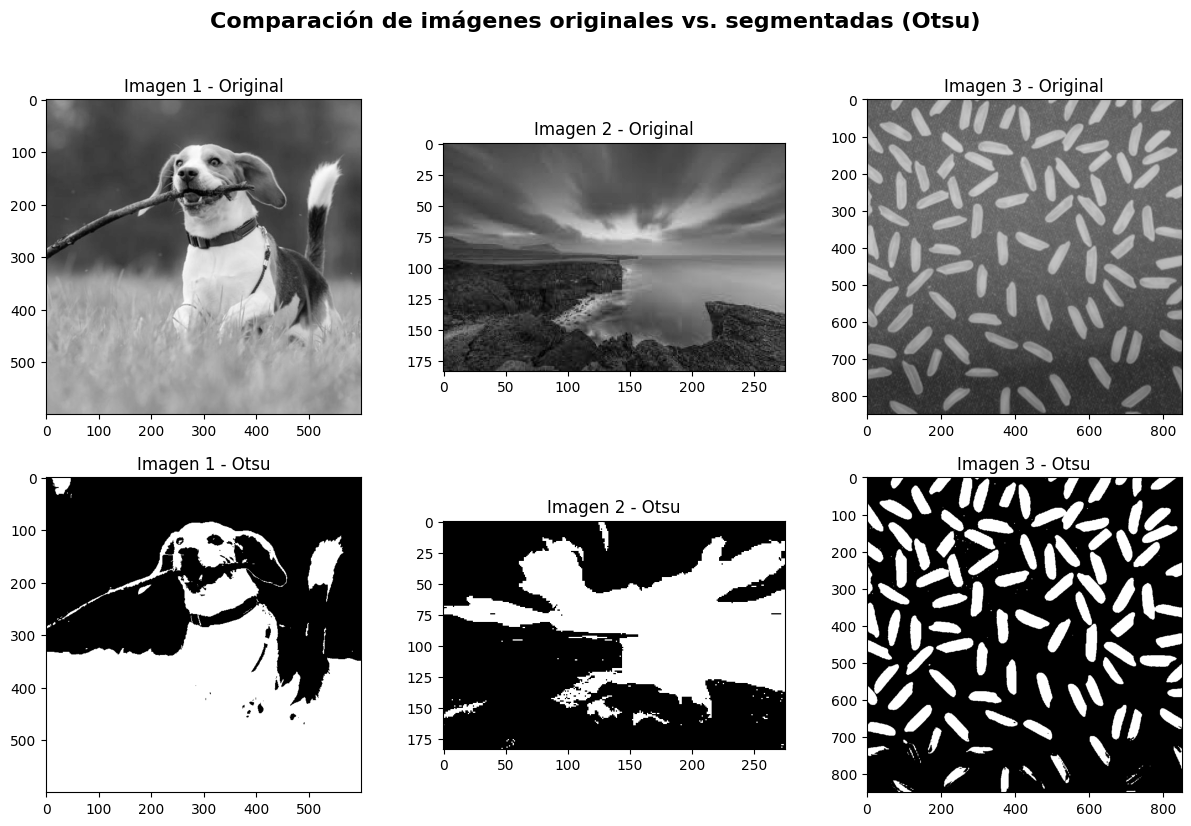

In [30]:
plt.figure(figsize=(15, 9))
plt.suptitle("Comparación de imágenes originales vs. segmentadas (Otsu)", fontsize=16, fontweight='bold')

# Imágenes 1
plt.subplot(2,3,1)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.title("Imagen 1 - Original")

plt.subplot(2,3,4)
plt.imshow(img1th, cmap='gray', vmin=0, vmax=255)
plt.title("Imagen 1 - Otsu")

# Imágenes 2
plt.subplot(2,3,2)
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
plt.title("Imagen 2 - Original")

plt.subplot(2,3,5)
plt.imshow(img2th, cmap='gray', vmin=0, vmax=255)
plt.title("Imagen 2 - Otsu")

# Imágenes 3
plt.subplot(2,3,3)
plt.imshow(img3, cmap='gray', vmin=0, vmax=255)
plt.title("Imagen 3 - Original")

plt.subplot(2,3,6)
plt.imshow(img3th, cmap='gray', vmin=0, vmax=255)
plt.title("Imagen 3 - Otsu")

plt.show()

### Algoritmo 3: Local

In [35]:
th1 = threshold_local(img1, block_size=255)
img1th = 255 * (img1 >= th1).astype(np.uint8)
print(th1)

th2 = threshold_local(img2, block_size=255)
img2th = 255 * (img2 >= th2).astype(np.uint8)
print(th2)

th3 = threshold_local(img3, block_size=255)
img3th = 255 * (img3 >= th3).astype(np.uint8)
print(th3)

[[107.66097947 107.65269325 107.63612601 ... 103.38641068 103.40188857
  103.40962968]
 [107.65204134 107.64375645 107.62719185 ... 103.38506347 103.40054046
  103.40828112]
 [107.63417049 107.62588825 107.60932895 ... 103.38236972 103.3978449
  103.40558466]
 ...
 [166.92422602 166.92486328 166.92613713 ... 159.12244038 159.12879886
  159.13198258]
 [166.9241765  166.92481459 166.92609009 ... 159.12088598 159.12725017
  159.13043675]
 [166.92415148 166.92478998 166.92606631 ... 159.12010734 159.12647439
  159.12966239]]
[[ 80.94698399  80.95348778  80.96649009 ... 103.66616603 103.66627408
  103.6663272 ]
 [ 80.94608386  80.95258823  80.9655917  ... 103.67536436 103.67546859
  103.67551981]
 [ 80.94425484  80.95076036  80.96376615 ... 103.69375055 103.69384715
  103.69389455]
 ...
 [ 52.04781632  52.04658969  52.04411498 ...  76.41237657  76.41318327
   76.41358704]
 [ 52.04385472  52.04262407  52.04014129 ...  76.36557713  76.36638232
   76.36678533]
 [ 52.04187666  52.040644    52.0

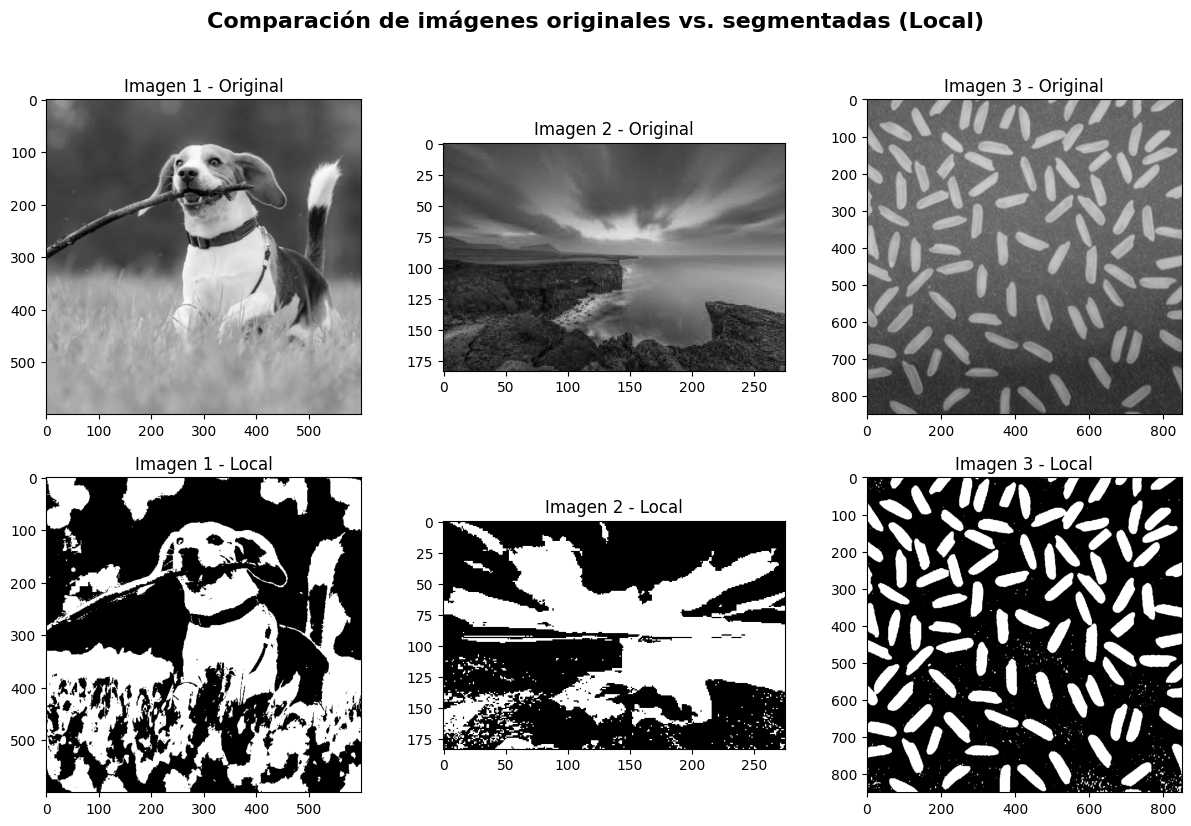

In [36]:
plt.figure(figsize=(15, 9))
plt.suptitle("Comparación de imágenes originales vs. segmentadas (Local)", fontsize=16, fontweight='bold')

# Imágenes 1
plt.subplot(2,3,1)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.title("Imagen 1 - Original")

plt.subplot(2,3,4)
plt.imshow(img1th, cmap='gray', vmin=0, vmax=255)
plt.title("Imagen 1 - Local")

# Imágenes 2
plt.subplot(2,3,2)
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
plt.title("Imagen 2 - Original")

plt.subplot(2,3,5)
plt.imshow(img2th, cmap='gray', vmin=0, vmax=255)
plt.title("Imagen 2 - Local")

# Imágenes 3
plt.subplot(2,3,3)
plt.imshow(img3, cmap='gray', vmin=0, vmax=255)
plt.title("Imagen 3 - Original")

plt.subplot(2,3,6)
plt.imshow(img3th, cmap='gray', vmin=0, vmax=255)
plt.title("Imagen 3 - Local")

plt.show()

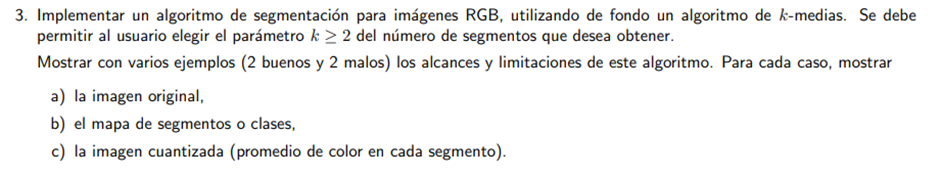

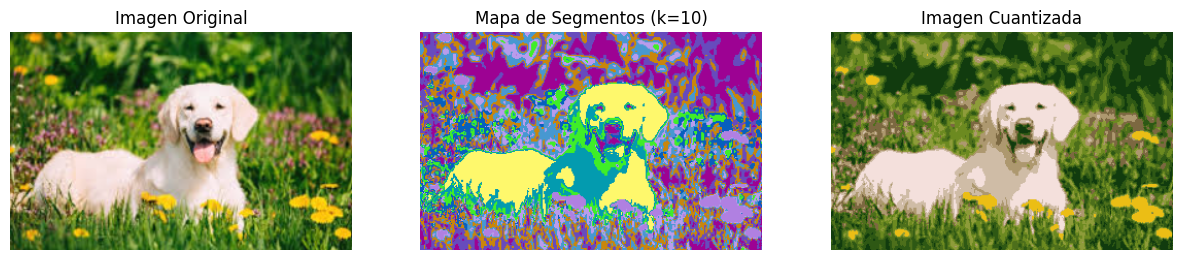

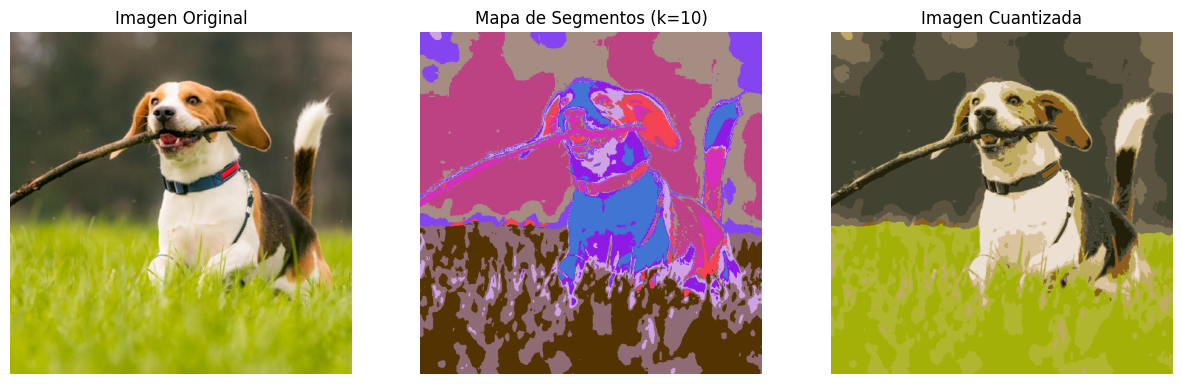

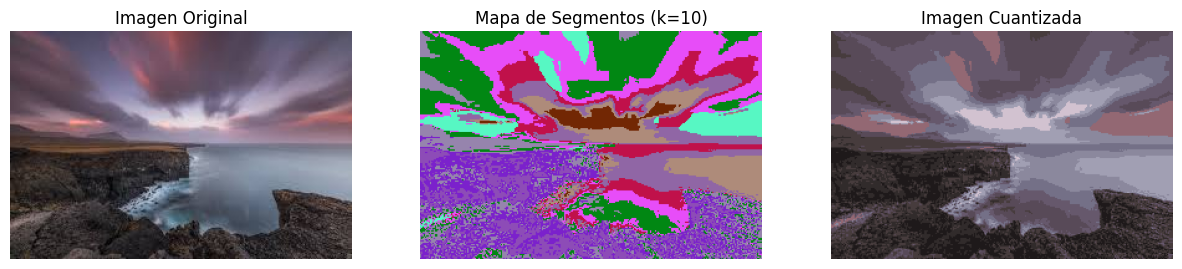

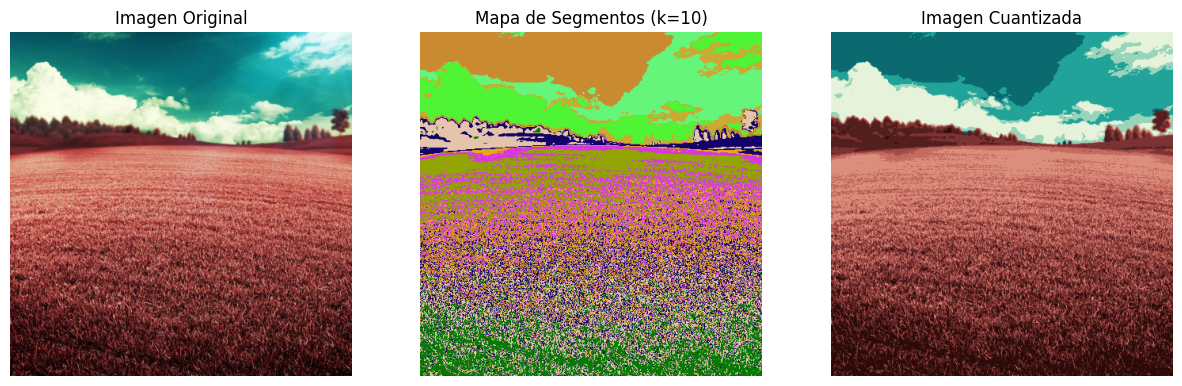

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def segmentation_rgb(image, k):

    x, y, z = image.shape
    pixels = image.reshape((-1, 3)) # Obtener dimensiones y convertirla a un arreglo de pixeles.

    pixels = np.float32(pixels) # Convertir los pixeles a float32

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    
    # Aplicar K-means
    _, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    centers = np.uint8(centers) # Convertir los centros a uint8
    
    # Crear la imagen cuantizada
    quantized_image = centers[labels.flatten()].reshape((x, y, z))
    
    # Crear el mapa de segmentos con colores únicos
    labels_reshaped = labels.reshape((x, y))
    segment_map = np.zeros((x, y, 3), dtype=np.uint8)

    colors = np.random.randint(0, 255, (k, 3), dtype=np.uint8)
    for i in range(k):
        segment_map[labels_reshaped == i] = colors[i]

    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    
    axs[0].imshow(image)
    axs[0].set_title("Imagen Original")
    axs[0].axis("off")
    
    axs[1].imshow(segment_map)
    axs[1].set_title(f"Mapa de Segmentos (k={k})")
    axs[1].axis("off")
    
    axs[2].imshow(quantized_image)
    axs[2].set_title("Imagen Cuantizada")
    axs[2].axis("off")
    
    plt.show()

good_image1 = "./assets/dog3.png"
good_image2 = "./assets/dog23.jpg"
bad_image1 = "./assets/iceland3.jpg"
bad_image2 = "./assets/landscape2.png"

good_image1 = cv2.imread(good_image1)
good_image2 = cv2.imread(good_image2)
bad_image1 = cv2.imread(bad_image1)
bad_image2 = cv2.imread(bad_image2)

good_image1 = cv2.cvtColor(good_image1, cv2.COLOR_BGR2RGB)
good_image2 = cv2.cvtColor(good_image2, cv2.COLOR_BGR2RGB)
bad_image1 = cv2.cvtColor(bad_image1, cv2.COLOR_BGR2RGB)
bad_image2 = cv2.cvtColor(bad_image2, cv2.COLOR_BGR2RGB)

k = int(input("Ingrese el numero de segmentos que desea utilizar: "))

while k < 2:
    k = int(input("Ingrese el numero de segmentos que desea utilizar: "))

segmentation_rgb(good_image1, k)
segmentation_rgb(good_image2, k)
segmentation_rgb(bad_image1, k)
segmentation_rgb(bad_image2, k)


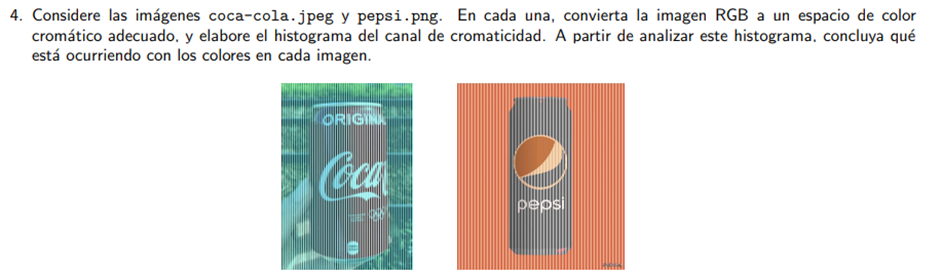

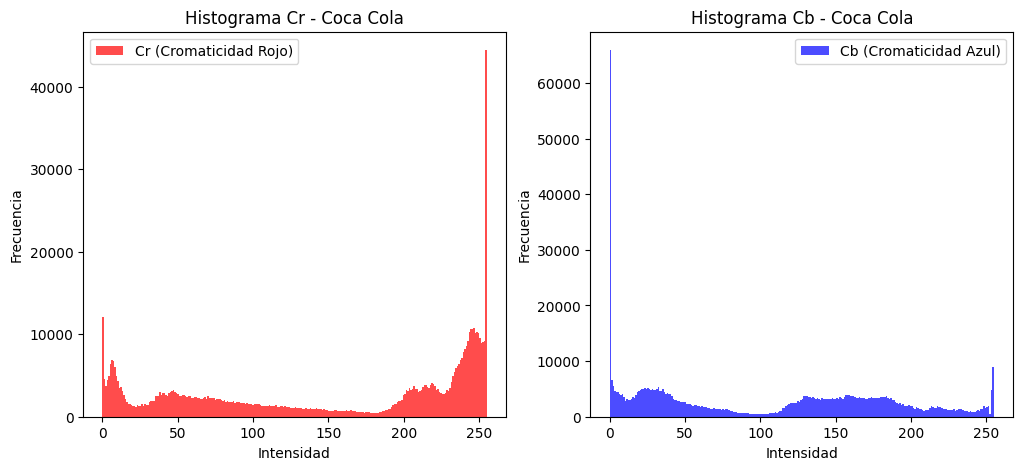

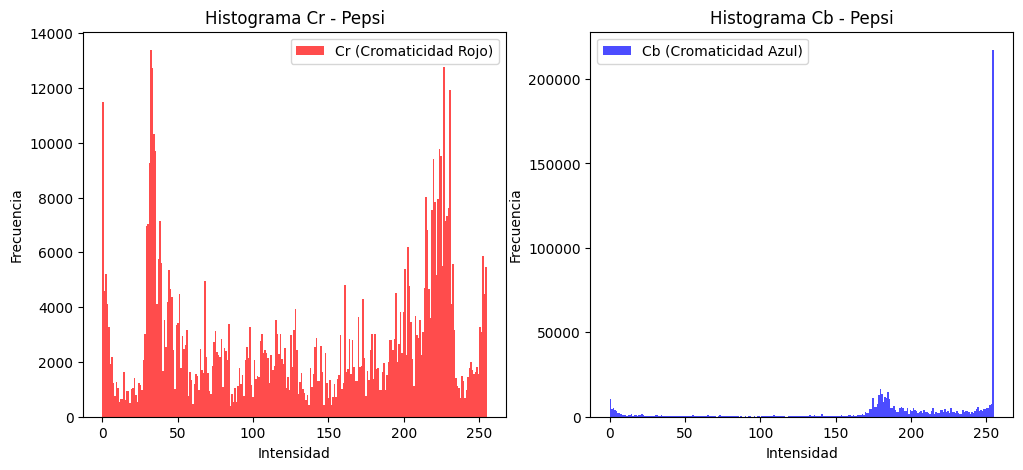

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def chromatic_histogram(image, Cr, Cb):
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.hist(Cr.ravel(), bins=256, color='red', alpha=0.7, label="Cr (Cromaticidad Rojo)")
    plt.title(f"Histograma Cr - {image}")
    plt.xlabel("Intensidad")
    plt.ylabel("Frecuencia")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.hist(Cb.ravel(), bins=256, color='blue', alpha=0.7, label="Cb (Cromaticidad Azul)")
    plt.title(f"Histograma Cb - {image}")
    plt.xlabel("Intensidad")
    plt.ylabel("Frecuencia")
    plt.legend()

    plt.show()

pepsi_image = "./assets/pepsi.png"
coke_image = "./assets/coca-cola.jpeg"

pepsi = cv2.imread(pepsi_image) # Leer las imágenes
coke = cv2.imread(coke_image)

pepsi_YCrCb = cv2.cvtColor(pepsi, cv2.COLOR_RGB2YCrCb) # Convertirlas a RGB
coke_YCrCb = cv2.cvtColor(coke, cv2.COLOR_RGB2YCrCb)

# Extraer canales Cr (rojo) y Cb (azul) → Cromaticidad
pepsi_Cr, pepsi_Cb = pepsi_YCrCb[:, :, 1], pepsi_YCrCb[:, :, 2]
coke_Cr, coke_Cb = coke_YCrCb[:, :, 1], coke_YCrCb[:, :, 2]

pepsi_Cr, pepsi_Cb = pepsi[:, :, 1], pepsi[:, :, 2] # Extraer los canales de cromaticidad
coke_Cr, coke_Cb = coke[:, :, 1], coke[:, :, 2]

# Mostrar los histogramas cromáticos
chromatic_histogram("Coca Cola", coke_Cr, coke_Cb)
chromatic_histogram("Pepsi", pepsi_Cr, pepsi_Cb)

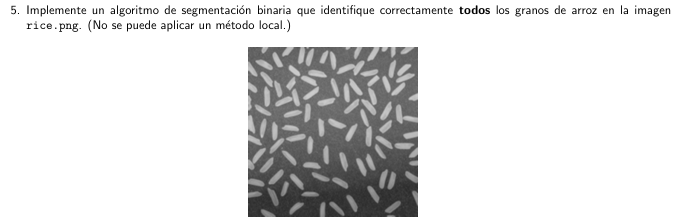

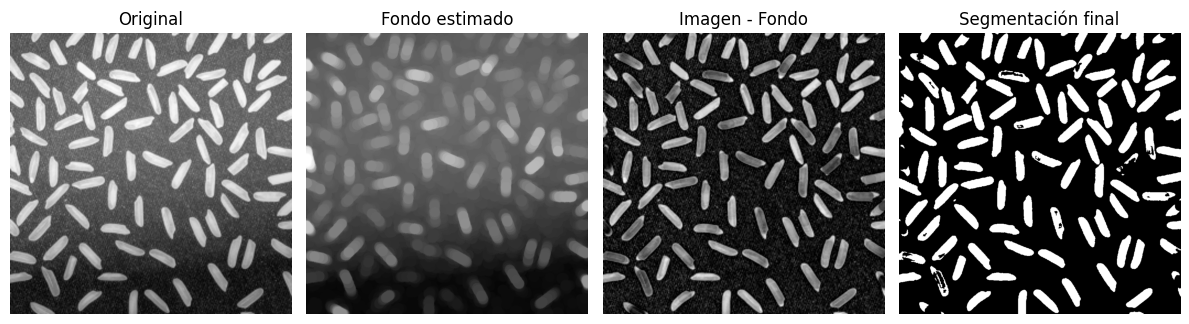

In [15]:
import matplotlib.pyplot as plt
import numpy as np

from skimage import io, filters, morphology
from skimage.color import rgb2gray

img = io.imread('./assets/rice.jpg')
if len(img.shape) == 3:
    img_gray = rgb2gray(img)
else:
    img_gray = img


selem = morphology.disk(15)
bg = morphology.opening(img_gray, selem)

img_sub = img_gray - bg

# Metodo Global OTSU
thresh_val = filters.threshold_otsu(img_sub)
binary = img_sub > thresh_val


binary_clean = morphology.remove_small_objects(binary, min_size=20)
binary_clean = morphology.remove_small_holes(binary_clean, area_threshold=20)

# Visualización de resultados
fig, axes = plt.subplots(1, 4, figsize=(12, 4))
axes[0].imshow(img_gray, cmap='gray')
axes[0].set_title('Original')
axes[1].imshow(bg, cmap='gray')
axes[1].set_title('Fondo estimado')
axes[2].imshow(img_sub, cmap='gray')
axes[2].set_title('Imagen - Fondo')
axes[3].imshow(binary_clean, cmap='gray')
axes[3].set_title('Segmentación final')
for ax in axes:
    ax.axis('off')
plt.tight_layout()
plt.show()


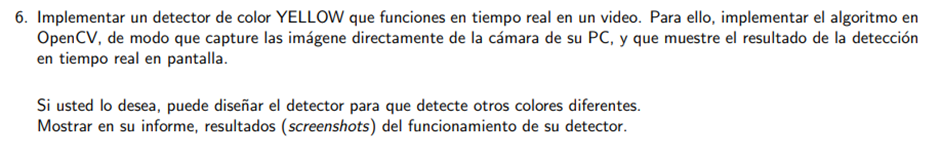

In [16]:
import cv2
import numpy as np

# --- Paso 1: Selección de color ---
print("Elige un color a detectar:")
print("1. Amarillo")
print("2. Azul")
print("3. Rojo")
try:
    opcion = int(input("Ingresa la opción (1/2/3): "))
except ValueError:
    print("Entrada no válida. Se seleccionará amarillo por defecto.")
    opcion = 1

# Definimos rangos de color en HSV según la opción elegida
if opcion == 1:
    lower_color = np.array([20, 100, 100], np.uint8)
    upper_color = np.array([30, 255, 255], np.uint8)
    color_name = "amarillo"
elif opcion == 2:
    lower_color = np.array([100, 150, 0], np.uint8)
    upper_color = np.array([140, 255, 255], np.uint8)
    color_name = "azul"
elif opcion == 3:
    lower_color = np.array([0, 120, 70], np.uint8)
    upper_color = np.array([10, 255, 255], np.uint8)
    color_name = "rojo"
else:
    print("Opción no válida. Se seleccionará amarillo por defecto.")
    lower_color = np.array([20, 100, 100], np.uint8)
    upper_color = np.array([30, 255, 255], np.uint8)
    color_name = "amarillo"

# --- Paso 2: Iniciamos la captura de video ---
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("No se pudo acceder a la cámara.")
    exit()

# --- Paso 3: Procesamiento cuadro a cuadro ---
try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("No se pudo leer el frame de la cámara.")
            break

        # Convertir la imagen de BGR a HSV
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

        # Crear la máscara según el rango de color seleccionado
        mask = cv2.inRange(hsv, lower_color, upper_color)

        # Operaciones morfológicas para quitar ruido
        kernel = np.ones((5, 5), np.uint8)
        mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
        mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

        # Aplicamos la máscara a la imagen original
        result = cv2.bitwise_and(frame, frame, mask=mask)

        # Mostramos en pantalla
        cv2.imshow("Frame original", frame)
        cv2.imshow(f"Mascara {color_name}", mask)
        cv2.imshow(f"Deteccion {color_name}", result)

        # Presiona ESC para salir
        if cv2.waitKey(1) & 0xFF == 27:  # Código ASCII de ESC
            print("Cerrando el programa...")
            break

except KeyboardInterrupt:
    print("\nInterrupción detectada. Cerrando el programa...")

finally:
    # Liberamos la cámara y cerramos las ventanas
    cap.release()
    cv2.destroyAllWindows()
    print("Recursos liberados correctamente.")


Elige un color a detectar:
1. Amarillo
2. Azul
3. Rojo

Interrupción detectada. Cerrando el programa...
Recursos liberados correctamente.
